**ideas**

*   slowly turn the robot until it's split (half and half)
*   use a linear regression model to determine how much to turn based on contour size
*   ...



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.color
from sklearn.linear_model import LinearRegression

In [ ]:
def find_largest_contour(contours):
  largest = max(contours, key = cv2.contourArea)
  return largest

In [ ]:
img = cv2.imread(".jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

error: ignored

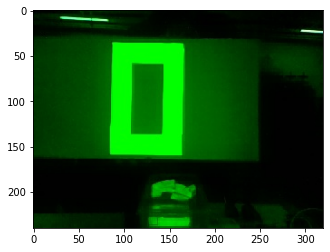

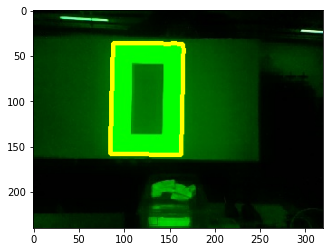

In [ ]:
img = cv2.imread("reflective.jpeg")
plt.imshow(img)
plt.show()

mask = cv2.threshold(cv2.imread("reflective.jpeg", cv2.IMREAD_GRAYSCALE), 128, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # filtered_mask = cv2.medianBlur(mask, 11)
# contours2 = cv2.findContours(filtered_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = find_largest_contour(contours)

# plt.imshow(cv2.drawContours(img.copy(), contours, -1, (255,255,0), 3))
# plt.show()
plt.imshow(cv2.drawContours(img.copy(), [largest_contour], -1, (255,255,0), 3))
plt.show()

In [ ]:
def align_with_hub(largest_contour):
  x,y,rect_w,rect_h = cv2.boundingRect(largest_contour)
  x_center = x + rect_w/2
  if x_center < img_w/2:
    # move right
    print("move right")
    align_with_hub() # put new photo after moving robot
  elif x_center > img_w/2:
    # move left
    print("move left")
    align_with_hub() # put new photo after moving robot
  else:
    print("ready to shoot")

In [ ]:
img_h, img_w, channels = img.shape
align_with_hub(largest_contour)

move right


TypeError: ignored